In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from pprint import pprint
import datetime
%matplotlib inline 

In [296]:
data = pd.read_csv("train.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [297]:
print("Shape of the dataset:",data.shape)

Shape of the dataset: (32561, 15)


In [298]:
cols = data.columns.values
print("Columns in the dataset are",cols,"respectively")

Columns in the dataset are ['age' 'workclass' 'fnlwgt' 'education' 'education.num' 'marital.status'
 'occupation' 'relationship' 'race' 'sex' 'capital.gain' 'capital.loss'
 'hours.per.week' 'native.country' 'target'] respectively


In [299]:
#Renaming column names in proper format
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
 'hours_per_week', 'native_country', 'target']
data.columns = col_names

cols = data.columns.values
print("Columns in the dataset are",cols,"respectively")

Columns in the dataset are ['age' 'workclass' 'fnlwgt' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country' 'target'] respectively


In [300]:
#summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [301]:
numberic_col = data.select_dtypes(include=np.number)
non_numberic_col = data.select_dtypes(exclude=np.number)

numberic_col consists of data in numberic type and non_numberic_col consists of non-numberic type

In [302]:
data.isnull().values.any()

True

In [303]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


We can see that 75% of values in capital.gain and capital.loss are zero.

In [305]:
zero_cols = ['capital_gain','capital_loss']
zero_values = (data[zero_cols]==0).sum()
print(zero_values,"\n","out of",data.shape[0])

capital_gain    29849
capital_loss    31042
dtype: int64 
 out of 32561


We should consider removing these columns for more accurate results

<b>IDENTIFYING MISSING VALUES

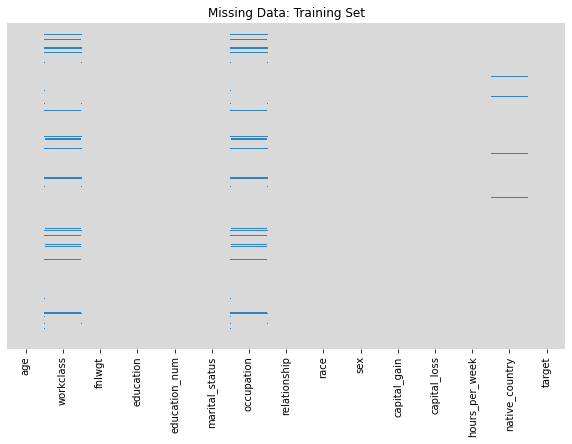

In [306]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [320]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : 'Percentage'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'Percentage', ascending=False).round(1)
    print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [321]:
missing_values_table(data)

Dataframe has 15 columns.
There are 3 columns that have missing values.


,Missing Values,Percentage
occupation,1843,5.7
workclass,1836,5.6
native_country,583,1.8


Here, we can see that Occupation, workclass and native_country columns have few missing values

<b>IDENTIFYING DUPLICATE VALUES

In [151]:
duplicate = data[data.duplicated()] 
  
print("There are",duplicate.shape[0],"duplicate Rows in the dataset.") 
duplicate.head()

There are 24 duplicate Rows in the dataset.


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


<b>DATA VISUALIZATION

In [273]:
income_count = pd.DataFrame(data['target'].value_counts())
income_count['percentange'] = pd.DataFrame(data['target'].value_counts()/len(data)*100)
income_count

,target,percentange
<=50K,24720,75.919044
>50K,7841,24.080956


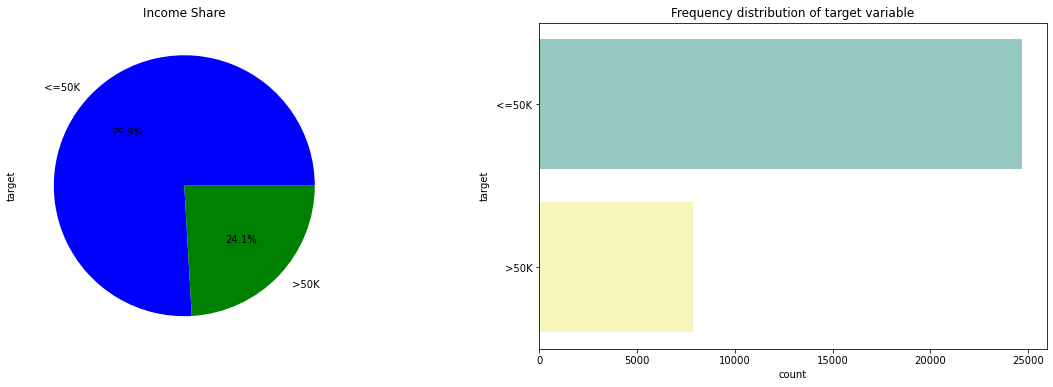

In [329]:
# visualize frequency distribution of target variable

f,ax=plt.subplots(1,2,figsize=(20,6))

ax[0] = data['target'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],colors=['blue','green'])
ax[0].set_title('Income Share')

ax[1] = sns.countplot(y="target", data=data, palette="Set3")
ax[1].set_title("Frequency distribution of target variable")

plt.show()

We can see that almost 75% of people might get above 50K of salary.

In [90]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

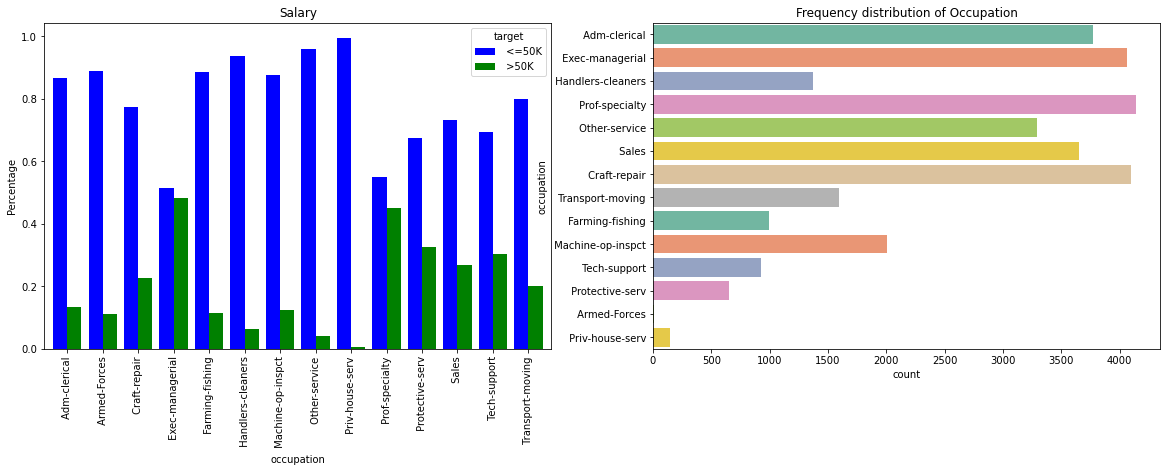

In [337]:
f,ax=plt.subplots(1,2,figsize=(20,6))

ax[0] = pd.crosstab([data.occupation], data.target, normalize='index').plot(kind='bar',width=0.8,ax=ax[0],color=['blue','green'],ylabel="Percentage")
ax[0].set_title('Salary')

ax[1] = sns.countplot(y="occupation", data=data, palette="Set2")
ax[1].set_title("Frequency distribution of Occupation")

plt.show()

We can see that lot of people's occupation are Prof-specialty, Exec-managerial, Craft-repair and Adm-clerical and those who having Exec-managerial and Prof-specialty as their occupation are more likely to get an income of above 50k.

In [16]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

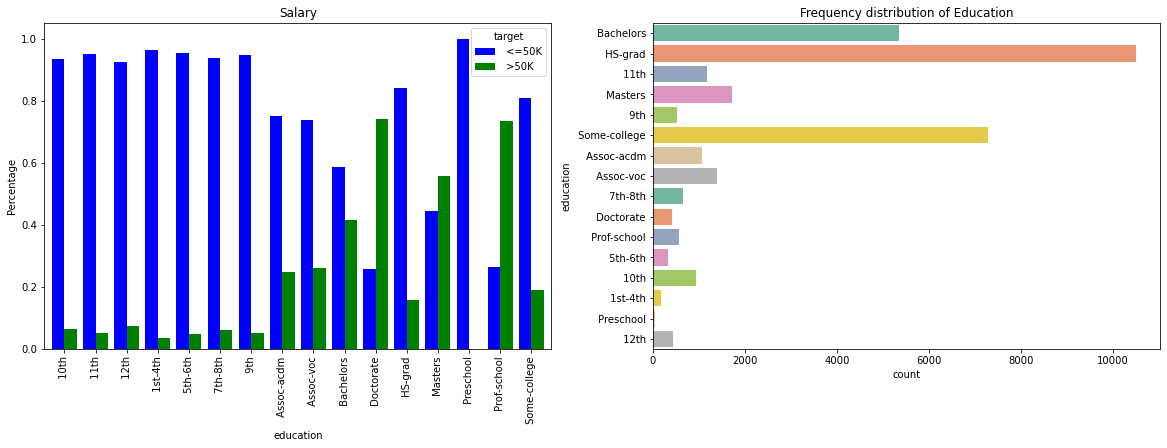

In [346]:
f,ax=plt.subplots(1,2,figsize=(20,6))

ax[0] = pd.crosstab([data.education], data.target, normalize='index').plot(kind='bar',width=0.8,ax=ax[0],color=['blue','green'],ylabel="Percentage")
ax[0].set_title('Salary')

ax[1] = sns.countplot(y="education", data=data, palette="Set2")
ax[1].set_title("Frequency distribution of Education")

plt.show()

We can see that people are atleast completed their HS-grad and some college and those who completed their Doctorate and studied in professional school are more likely to get an income of above 50k.

In [355]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

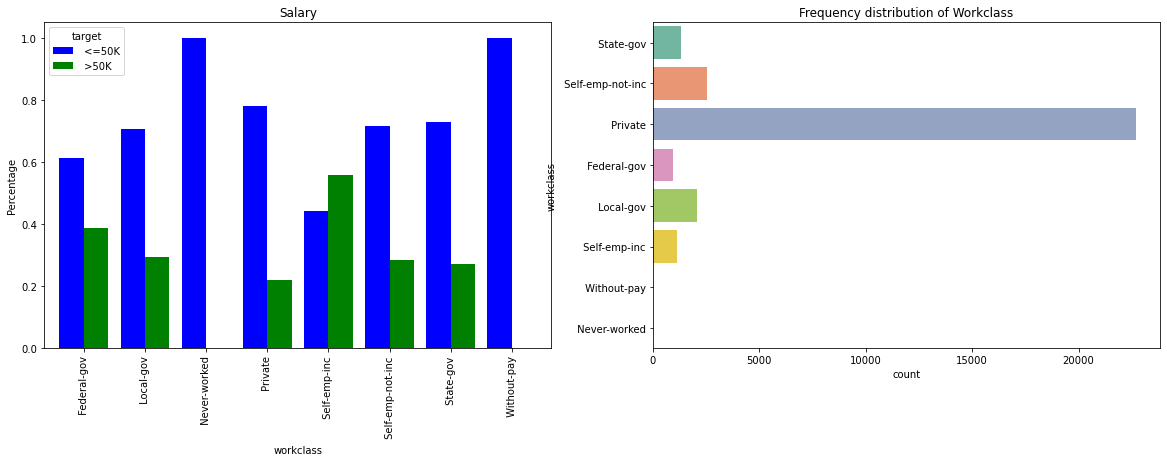

In [354]:
f,ax=plt.subplots(1,2,figsize=(20,6))

ax[0] = pd.crosstab([data.workclass], data.target, normalize='index').plot(kind='bar',width=0.8,ax=ax[0],color=['blue','green'],ylabel="Percentage")
ax[0].set_title('Salary')

ax[1] = sns.countplot(y="workclass", data=data, palette="Set2")
ax[1].set_title("Frequency distribution of Workclass")

plt.show()

We can see that there are lot more private workers than other category of workers and incorporated self employees are likely to get salary of above 50k.

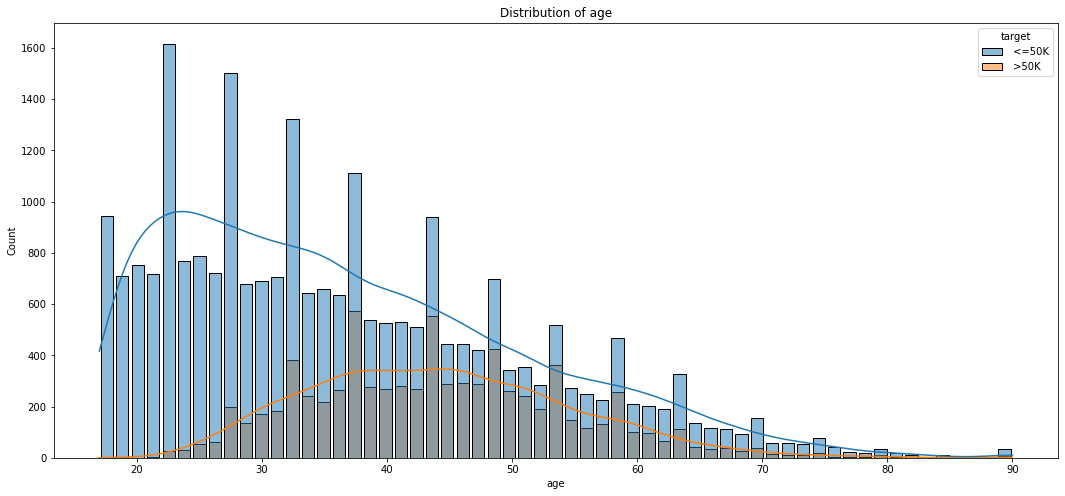

In [399]:
f, ax = plt.subplots(figsize=(18,8))
sns.histplot(data=data, x="age", hue="target",kde=True,shrink=.8)
ax.set_title("Distribution of age")
plt.show()

In [396]:
print("Average age for a person to get an income of above 50k is",data.age.mean())

Average age for a person to get an income of above 50k is 38.58164675532078


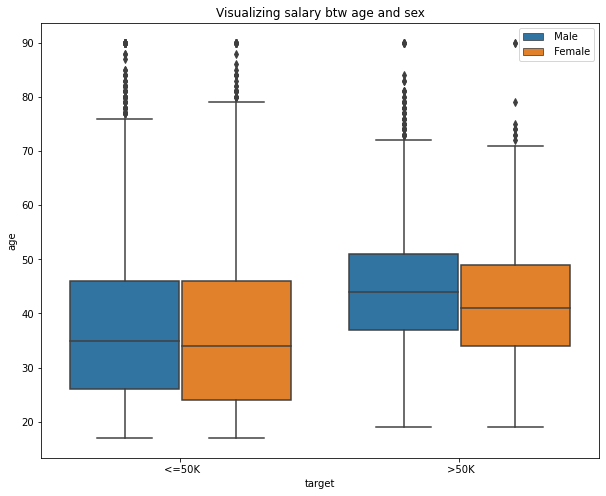

In [404]:
#Boxplot
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="target", y="age", hue="sex", data=data,)
ax.set_title("Visualizing salary btw age and sex")
ax.legend(loc='upper right')
plt.show()

Elder people and males are more likely to get an income of above 50k